## Problem Statement :

Given is a list of business descriptions for around 24,000 companies (provided in the file company descriptions). There are 2 types of descriptions – long and short. Use your discretion while using either. Perform the following task using the file:  
Given the same set of the companies with their business descriptions, cluster these companies,
without using any information from the industry labels. Also, identify ways to calculate the
accuracy of the clusters generated   

## Sequential steps followed during problem solving :
1. Exploring the dataset.
2. Text Preprocessing ( including lemmatization ).
3. Feature Engineering using CountVectorizer.
4. Modeling and evaluating quality of cluster.
5. Feature Engineering using TfidfVectorizer.
6. Modeling and evaluating quality of cluster :
7. Conclusion.

## 1. Exploring the dataset :

In [1]:
# importing common used library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing file on google colab

#from google.colab import files
#files.upload()

In [3]:
# reading the datasets
company = pd.read_excel("company descriptions.xlsx")

# copying the datasets so that after any manupulation we still have original dataset
company_copy=company.copy()

# checking dimension of dataset
company.shape

(19965, 3)

In [4]:
# accessing first five rows of dataset to see how it looks like

print("*"*71)
print("first five rows of dataset :-")
print("*"*71)
company.head()

***********************************************************************
first five rows of dataset :-
***********************************************************************


,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


## 2. Text Preprocessing :

In [5]:
import re
import string

# removing number, punctuation etc
# converting into lower case

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

company['company_short_description'] = company.company_short_description.map(alphanumeric).map(punc_lower)
company.head()

,company_name,company_short_description,company_description
0,Codementor,codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,agshift is designing world s most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,opennews helps a global network of developers ...,"We're helping a global network of developers, ..."
4,Biobot Analytics,biobot analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


In [6]:
# importing library for text preprocessing part

import nltk

# this 2nd line doesn't require in jupyter notebook adter downloading once
# but in google golab it requires again if we end/close this notebook

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Purushottam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# importing stopwords 

from nltk.corpus import stopwords

# remvoing stopwords as it doesn't play any important role

stop = stopwords.words('english')

In [8]:
company['company_short_description'] = company['company_short_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
company.head(3)

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,Codementor provides live 1:1 help for software...
1,AgShift,agshift designing world advanced autonomous fo...,AgShift solution blends Deep Learning with Com...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,Shipsi empowers any retailer with the ability ...


In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Purushottam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# bringing derived word to its base or root form

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return  ' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text))

company['company_short_description'] = company['company_short_description'].apply(lemmatize_text)
company.head()

,company_name,company_short_description,company_description
0,Codementor,codementor online marketplace connecting devel...,Codementor provides live 1:1 help for software...
1,AgShift,agshift designing world advanced autonomous fo...,AgShift solution blends Deep Learning with Com...
2,Shipsi,shipsi empowers retailer ability offer easy “i...,Shipsi empowers any retailer with the ability ...
3,OpenNews,opennews help global network developer journal...,"We're helping a global network of developers, ..."
4,Biobot Analytics,biobot analytics analyzes city sewage estimate...,Biobot Analytics analyzes sewage to estimate o...


In [11]:
# considering only company_short_description for clustering

comp_short = company['company_short_description']

## 3. Feature Engineering using CountVectorizer :

In [12]:
# vectorizing the sentences

from sklearn.feature_extraction.text import CountVectorizer

# max_features=1000, this parameter I have added after running model once and model is taking long time to fit on large number of columns
# total columns = 24000

vect = CountVectorizer(stop_words='english',max_features=1000)
vect.fit(comp_short)

# printing the vocabulary
vect.vocabulary_

{'online': 632,
 'marketplace': 565,
 'connecting': 191,
 'developer': 262,
 'expert': 350,
 'demand': 249,
 'help': 427,
 'screen': 805,
 'sharing': 826,
 'video': 965,
 'text': 908,
 'chat': 147,
 'designing': 255,
 'world': 996,
 'advanced': 17,
 'autonomous': 74,
 'food': 382,
 'using': 953,
 'deep': 241,
 'learning': 515,
 'empowers': 320,
 'retailer': 779,
 'offer': 627,
 'easy': 300,
 'instant': 470,
 'delivery': 248,
 'page': 653,
 'global': 407,
 'network': 620,
 'maker': 549,
 'collaborate': 162,
 'innovative': 467,
 'code': 160,
 'new': 622,
 'idea': 443,
 'analytics': 37,
 'analyzes': 39,
 'city': 153,
 'application': 48,
 'service': 821,
 'provider': 734,
 'provides': 735,
 'solution': 851,
 'architecture': 51,
 'engineering': 334,
 'construction': 195,
 'industry': 459,
 'internet': 485,
 'based': 81,
 'interactive': 482,
 'medical': 574,
 'education': 304,
 'product': 717,
 'com': 168,
 'site': 836,
 'finding': 373,
 'messaging': 585,
 'biotechnology': 96,
 'focused': 38

In [13]:
# checking length 

len(vect.vocabulary_.keys())

1000

In [14]:
# transforming the features using parameter obtained during fitting

comp_short_transformed = vect.transform(comp_short)
comp_short_transformed

<19965x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 140935 stored elements in Compressed Sparse Row format>

## 4. Modeling and evaluating quality of cluster :

In [15]:
# the reason for selecting KMeans algorithm over Hierarchical clustering because KMeans works well for large dataset

from sklearn.cluster import KMeans

# Silhouette score: Silhouette score tells how far away the datapoints in one cluster are, from the datapoints in another cluster.
# The range of silhouette score is from -1 to 1. Score should be closer to 1 than -1.
from sklearn.metrics import silhouette_score

For n_clusters=2, the silhouette score is 0.03138832018884223
For n_clusters=3, the silhouette score is 0.04662537514584557
For n_clusters=4, the silhouette score is 0.031407562441125705
For n_clusters=5, the silhouette score is 0.038948677177399624
For n_clusters=6, the silhouette score is 0.030470352176740902
For n_clusters=7, the silhouette score is 0.0311634533667154
For n_clusters=8, the silhouette score is 0.027144728267965334


Text(0, 0.5, 'Inertia')

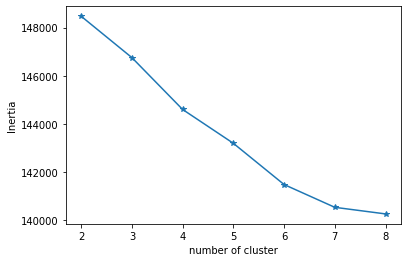

In [17]:
# elbow-curve

# Inertia: Intuitively, inertia tells how far away the points within a cluster are.
# Therefore, a small of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

# this list is taken to store intertia value
ssd = []

# the range, I have taken from 2 to 8 (is generally taken in industry and the reason for it is that no industry is going to form 150 clusters
# irrespective of interia value because it is not an easy task to handle such large group of people)

# this code little more time to run

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=99)
    kmeans.fit(comp_short_transformed)
    
    ssd.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(comp_short_transformed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# plotting ssd for each n_clusters

plt.plot(range_n_clusters, ssd, marker='*')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')

## Observations :

1. Inertia suddenly decreases (compare to all other points) at number of cluster = 4, so best choice for k is 4. (the choice may vary if we change random_state).
2. silhouette score is not so good but still it is not bad. Maximum points in a cluster is near to boundary because value of silhouette score is close to zero.

In [18]:
# now fitting model for k = 4

kmeans = KMeans(n_clusters=4, max_iter=50,random_state=99)
kmeans.fit(comp_short_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [19]:
company_copy['labels'] = kmeans.labels_

In [20]:
company_copy.head(10)

,company_name,company_short_description,company_description,labels
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...,3
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...,3
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...,3
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ...",3
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...,3
5,NetClerk,NetClerk is an application service provider (A...,"As of April 22, 2002, NetClerk Inc. was acquir...",3
6,Satellier,Satellier provides workshare solutions for the...,Satellier is one of the world's leading author...,0
7,MedCases,"MedCases, an Internet-based provider of intera...",MedCases focuses on the development of medical...,3
8,SpeedDate,SpeedDate.com is an online webcam-enhanced dat...,"SpeedDate.com is one of a slew of new online, ...",3
9,Raven Biotechnologies,Raven biotechnologies is focused on the develo...,"Raven biotechnologies, Inc., a biotechnology c...",3


In [21]:
company_copy.sort_values(['labels'])

,company_name,company_short_description,company_description,labels
6355,vidIQ,vidIQ is a YouTube audience development and ma...,vidIQ is the first YouTube audience developmen...,0
6214,VirtuOz,"VirtuOz, a digital customer relationships plat...",VirtuOz is the leader in Digital Customer Rela...,0
6213,Convertro,Convertro provides a marketing optimization pl...,Convertro provides clients with actionable spe...,0
6212,First Opinion,First Opinion provides easy access to doctors ...,First Opinion is like having a doctor in the f...,0
6205,OnFarm,"OnFarm creates seamless software, analytics, a...",OnFarm is a software-as-a-service company that...,0
...,...,...,...,...
8446,"VMEdu, Inc","Leading Global Adult Education Platform, funde...",NaN,3
8447,Verlocal,Free scheduling software and marketplace for l...,Verlocal is a community-driven marketplace evo...,3
8448,Brandfolder,Brandfolder is a digital asset management (DAM...,Brandfolder is a digital asset management (DAM...,3
8403,Jive Software,Jive Software operates as an independent socia...,Jive is the largest and fastest growing indepe...,3


In [22]:
# checking % of labels value

company_copy['labels'].value_counts()*100/company_copy.shape[0]

3    57.205109
0    17.916354
2    16.453794
1     8.424743
Name: labels, dtype: float64

In [23]:
# converting into csv and then downloading into local machine

company_copy.to_csv('labels_cluster_short_description.csv')
#files.download('labels_cluster_short_description.csv')

## 5. Feature Engineering using TfidfVectorizer :

In [24]:
comp_short_t = company['company_short_description']

from sklearn.feature_extraction.text import TfidfVectorizer

vect_t = TfidfVectorizer(max_features=1000)
vect_t.fit(comp_short_t)

# printing the vocabulary
vect_t.vocabulary_

{'online': 632,
 'marketplace': 568,
 'connecting': 195,
 'developer': 264,
 'expert': 351,
 'demand': 251,
 'help': 433,
 'via': 962,
 'screen': 801,
 'sharing': 822,
 'video': 963,
 'text': 904,
 'chat': 150,
 'designing': 257,
 'world': 996,
 'advanced': 18,
 'autonomous': 77,
 'food': 384,
 'system': 887,
 'using': 951,
 'deep': 243,
 'learning': 518,
 'empowers': 320,
 'retailer': 775,
 'offer': 626,
 'easy': 301,
 'instant': 474,
 'delivery': 250,
 'page': 653,
 'global': 412,
 'network': 618,
 'maker': 553,
 'collaborate': 166,
 'innovative': 471,
 'code': 164,
 'new': 620,
 'idea': 448,
 'analytics': 38,
 'analyzes': 40,
 'city': 156,
 'application': 51,
 'service': 817,
 'provider': 731,
 'provides': 732,
 'solution': 848,
 'architecture': 54,
 'engineering': 334,
 'construction': 199,
 'industry': 464,
 'internet': 490,
 'based': 84,
 'interactive': 486,
 'medical': 575,
 'education': 305,
 'product': 716,
 'com': 172,
 'site': 833,
 'finding': 374,
 'messaging': 585,
 'biote

In [25]:
len(vect_t.vocabulary_.keys())

1000

In [26]:
comp_short_transformed_t = vect_t.transform(comp_short_t)
comp_short_transformed_t

<19965x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 144804 stored elements in Compressed Sparse Row format>

## 6. Modeling and evaluating quality of cluster :

For n_clusters=2, the silhouette score is 0.005743451071871314
For n_clusters=3, the silhouette score is 0.00775665940636784
For n_clusters=4, the silhouette score is 0.008446922881853494
For n_clusters=5, the silhouette score is 0.009535278347038443
For n_clusters=6, the silhouette score is 0.010212428453768735
For n_clusters=7, the silhouette score is 0.010881272138591599
For n_clusters=8, the silhouette score is 0.012112166072157489


Text(0, 0.5, 'Inertia')

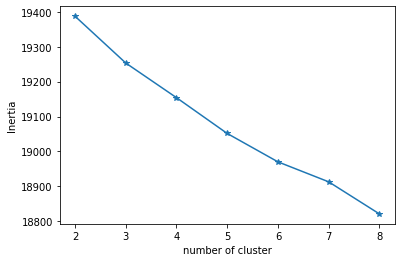

In [27]:
# elbow-curve

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=99)
    kmeans.fit(comp_short_transformed_t)
    
    ssd.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_
  

    # silhouette score
    silhouette_avg = silhouette_score(comp_short_transformed_t, cluster_labels)
    
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# plotting ssd for each n_clusters

plt.plot(range_n_clusters, ssd, marker='*')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')

## Observations :

1. There is no sudden decrease in inertia at any point. So Tfidf is not giving giving good result.
2. silhouette score is not so good but still it is not bad. Maximum points in a cluster is near to boundary because value of silhouette score is close to zero.

## Conclusion :
1. CountVectorizer works well compare to Tfidf.
2. Similarly, we can follow all steps to long description column as well.


References :
1. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
2. https://towardsdatascience.com/k-means-clustering-from-a-to-z-f6242a314e9a